# Packages

In [853]:
# Packages used for the project
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import csv

# Gather the Data

## Enhanced Twitter Archive 

We have this file on hand and so have downloaded it manually

In [854]:
# twitter archive is downloaded manually as a file we have on hand
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

## Image Predictions

The file (image_predictions.tsv) hosted on Udacity's servers and was downloaded programmatically using the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [855]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# Downloads the image_predictions.tsv programmatically from Udacity's servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [856]:
with open(os.path.join(folder_name, 
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [857]:
image_predictions = pd.read_csv('U:/Professional Development/Udacity/Projects/T2 P2/image_predictions/image-predictions.tsv', sep='\t')

## Twitter API

Tweet ID, retweet count and favorite count queried from Twitter's API. Available information includes:

  - reply_count: Number of times this Tweet has been replied to
  - retweet_count: Number of times this Tweet has been retweeted
  - favorite_count: Indicates approximately how many times this Tweet has been liked by Twitter users.
  - created_at: UTC time when this Tweet was created
  - withheld_in_countries: When present, indicates a list of uppercase two-letter country codes this content is withheld from. Twitter supports the following non-country values for this field: “XX” - Content is withheld in all countries “XY” - Content is withheld due to a DMCA request.

For this assessment I will use retweet_count and favorite_count.

## Twitter API additional twitter information

In [237]:
# Create authentication to Twtitter's API using Python's Tweepy library
# Take out consumer key, consumer secret, access token and access secret before submitting the project
#Twitter API credentials
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

#authorize twitter, initialize tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [342]:
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
        
    #initialize a list to hold all the tweepy Tweets
    alltweets = []    
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print("getting tweets before %s" % (oldest))
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print("...%s tweets downloaded so far" % (len(alltweets)))
    
    #transform the tweepy tweets into a 2D array that will populate the csv    
    outtweets = [[tweet.id_str, tweet.in_reply_to_status_id, tweet.in_reply_to_user_id, str(tweet.created_at), tweet.source, 
                  tweet.text.encode("utf-8")] for tweet in alltweets]
    
    #with open('%s_tweets.txt'% screen_name, 'w') as outfile:  
    #    json.dump(list(outtweets), outfile)  
    
    with open('%s_tweets.csv' % screen_name, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "timestamp", "source",
                         "text"])
        writer.writerows(outtweets)
    
    pass

    


if __name__ == '__main__':
    #pass in the username of the account you want to download
    get_all_tweets("dog_rates")


getting tweets before 925391981131448319
...399 tweets downloaded so far
getting tweets before 915290313941557247
...598 tweets downloaded so far
getting tweets before 908036999638069247
...797 tweets downloaded so far
getting tweets before 900374366629789696
...997 tweets downloaded so far
getting tweets before 892177421306343425
...1197 tweets downloaded so far
getting tweets before 883762009086537727
...1397 tweets downloaded so far
getting tweets before 876594457126109183
...1597 tweets downloaded so far
getting tweets before 869596645499047937
...1796 tweets downloaded so far
getting tweets before 860167721564217343
...1994 tweets downloaded so far
getting tweets before 851857518913572864
...2194 tweets downloaded so far
getting tweets before 840761248237133824
...2394 tweets downloaded so far
getting tweets before 835624797816176639
...2594 tweets downloaded so far
getting tweets before 829819886616637440
...2794 tweets downloaded so far
getting tweets before 822937869148950528
.

In [858]:
new_tweet_info = pd.read_csv('dog_rates_tweets.csv')

In [859]:
new_tweet_info

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text
0,932416024724488193,NaN,NaN,2017-11-20 01:11:18,Twitter for iPhone,b'This is Dave. He thinks he\xe2\x80\x99s a to...
1,932390033960636416,9.323885e+17,2.845196e+09,2017-11-19 23:28:01,Twitter for iPhone,b'@RasTheBerry \xe2\x9d\xa4\xef\xb8\x8f'
2,932352280350875649,9.323518e+17,2.937336e+07,2017-11-19 20:58:00,Twitter for iPhone,b'@reneereizman \xe2\x9d\xa4\xef\xb8\x8f'
3,932350214937153536,NaN,NaN,2017-11-19 20:49:48,Twitter for iPhone,b'Big thanks to @OutdoorVoices for hosting a w...
4,932316928806400000,9.323128e+17,7.613065e+17,2017-11-19 18:37:32,Twitter for iPhone,b'@TeamDan0717 @DevinLewis1500 weratedogs'
5,932316883981885441,9.323134e+17,7.946488e+17,2017-11-19 18:37:21,Twitter for iPhone,b'@k8ecope amazing'
6,932302510848724992,NaN,NaN,2017-11-19 17:40:14,Twitter for iPhone,"b""RT @DevinLewis1500: If you don't follow @dog..."
7,932023496938610688,9.320214e+17,8.805112e+17,2017-11-18 23:11:32,Twitter for iPhone,b'@agust_d97 @dog_feelings ok that\xe2\x80\x99...
8,932018401215746048,9.320104e+17,5.745075e+07,2017-11-18 22:51:17,Twitter for iPhone,b'@grjpatterson awwwww'
9,931958433372409857,NaN,NaN,2017-11-18 18:53:00,Twitter for iPhone,b'Meet Toby. After years of having to put effo...


In [860]:
#Compiling the list of tweet ids from the twitter_archive
archive_id = twitter_archive['tweet_id']
new_id = new_tweet_info['tweet_id']
tweet_id_list = pd.concat([archive_id, new_id])
tweet_id_list

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
               ...        
3171    805580710027427840
3172    805561819687436288
3173    805555276682248192
3174    805520635690676224
3175    805487436403003392
3176    805252815190970373
3

In [744]:
#querying twitter's api to get the retweet count and favorite count
#https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

tweet_count = []
tweet_errors = []
for tweetid in tweet_id_list:
    try:
        tweet = api.get_status(tweetid, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        print(tweetid)
        retweet_count = tweet.retweet_count
        favorite_count = tweet.favorite_count
        created_at = tweet.created_at
        tweet_count.append({'tweet_id': str(tweetid),
                            'retweet_count': retweet_count,
                            'favorite_count': favorite_count})
    except Exception as e:
        print(str(tweetid) + str(e))
        tweet_errors.append({'tweet_id': tweetid})


with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_count, outfile)     

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760


KeyboardInterrupt: 

In [432]:
# load the json file
with open('tweet_json.txt') as json_file:  
    tweet_count_list = json.load(json_file)

In [436]:
# Create a pandas data frame from the json file
tweet_count_list = pd.DataFrame(tweet_count_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_count_list = tweet_count_list.sort_values('tweet_id').reset_index(drop=True)
tweet_count_list.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 3 columns):
tweet_id          5550 non-null object
retweet_count     5550 non-null int64
favorite_count    5550 non-null int64
dtypes: int64(2), object(1)
memory usage: 130.2+ KB


In [726]:
# Create a pandas data frame for the tweets with a tweet_id error and creates a .csv file of the errors
tweet_errors = pd.DataFrame(tweet_errors, columns = ['tweet_id'])
tweet_errors.to_csv('tweet_errors.csv', index=False)

In [953]:
tweet_errors = pd.read_csv('tweet_errors.csv')

# Assessing the Data

Firstly we'll assess the twitter_archive file. The file has 2,356 entries with information of the tweets.

In [954]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [955]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Next we'll assess the new tweet information that was pulled from the Twitter API using Tweepy. Information from 3,200 tweets were downloaded from Twitter.

In [956]:
new_tweet_info.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text
0,932416024724488193,NaN,NaN,2017-11-20 01:11:18,Twitter for iPhone,b'This is Dave. He thinks he\xe2\x80\x99s a to...
1,932390033960636416,9.323885e+17,2.845196e+09,2017-11-19 23:28:01,Twitter for iPhone,b'@RasTheBerry \xe2\x9d\xa4\xef\xb8\x8f'
2,932352280350875649,9.323518e+17,2.937336e+07,2017-11-19 20:58:00,Twitter for iPhone,b'@reneereizman \xe2\x9d\xa4\xef\xb8\x8f'
3,932350214937153536,NaN,NaN,2017-11-19 20:49:48,Twitter for iPhone,b'Big thanks to @OutdoorVoices for hosting a w...
4,932316928806400000,9.323128e+17,7.613065e+17,2017-11-19 18:37:32,Twitter for iPhone,b'@TeamDan0717 @DevinLewis1500 weratedogs'


In [957]:
new_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 6 columns):
tweet_id                 3201 non-null int64
in_reply_to_status_id    1854 non-null float64
in_reply_to_user_id      1871 non-null float64
timestamp                3201 non-null object
source                   3201 non-null object
text                     3201 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 150.1+ KB


Next we'll assess the image_predictions file. The file has predictions on 2,075 tweets. 

In [958]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [959]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [960]:
image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
teddy                         18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
beagle                        18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

Finally we will assess the tweet_count_list information.

In [961]:
tweet_count_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 3 columns):
tweet_id          5550 non-null object
retweet_count     5550 non-null int64
favorite_count    5550 non-null int64
dtypes: int64(2), object(1)
memory usage: 130.2+ KB


In [962]:
tweet_count_list.describe()

,retweet_count,favorite_count
count,5550.000000,5550.000000
mean,3573.423243,7028.966667
std,13565.851448,13343.306947
min,0.000000,0.000000
25%,9.000000,40.000000
50%,658.000000,1325.000000
75%,3111.250000,8301.000000
max,476249.000000,218953.000000


# Initial Issues

## Quality 

  - We only want original ratings (no retweets) that have images
  - Some dogs don't have a dog type
  - Missing image predictions
  - Missing dog type are not NAN, but 'none'
  - Incorrect ratings example tweet id 883482846933004... should be 13.5/10 not 5/10
  - Incorrect dog names
  - Invalid tweet ids
	  - 888202515573088257
	  - 869988702071779329
	  - 861769973181624320
	  - 842892208864923648
	  - 802247111496568832
	  - 775096608509886464
	  - 758740312047005698
 
## Tidiness

  - Twitter archive has a column for each dog type
  - Dog ratings and dog type predictions in different files

## Copy

Make a copy of the three datasets to work on

In [963]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_count_clean = tweet_count_list.copy()
new_tweet_info_clean = new_tweet_info.copy()

# Cleaning

## Issue

Invalid tweet ids resulting in missing information from the twitter API
  - 888202515573088257
  - 869988702071779329
  - 861769973181624320
  - 842892208864923648
  - 802247111496568832
  - 775096608509886464
  - 758740312047005698
  
## Clean

Find invalid tweet ids and pull the tweet id from the expanded_urls column

In [964]:
#turn tweet errors into a list
tweet_errors = tweet_errors['tweet_id'].tolist()

In [965]:
# pull the tweet ids from the expanded urls columns
twitter_archive_clean['clean_id'] = twitter_archive_clean.expanded_urls.str.extract('(\d{18})',expand=True)
tweet_clean_id_list = twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(tweet_errors)].clean_id
tweet_clean_id_list = tweet_clean_id_list.tolist()
tweet_clean_id_list

['887473957103951883',
 '859196978902773760',
 '806629075125202948',
 '807106840509214720',
 '779056095788752897',
 '740373189193256964']

In [966]:
# test
twitter_archive_clean[twitter_archive_clean['tweet_id']==888202515573088257].clean_id

19    887473957103951883
Name: clean_id, dtype: object

In [967]:
# test
twitter_archive_clean[twitter_archive_clean['tweet_id']==887473957103951883]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,clean_id
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None,887473957103951883


## Issue

The clean ids pulled from the expanded urls are in the tweet_ids.  Upon further investigation there are a number of duplicated tweet_ids. The duplicated ids include the retweeted statuses that we want to remove.

In [968]:
#test 
twitter_archive_clean['duplicates'] = twitter_archive_clean.duplicated(subset='clean_id', keep=False)
twitter_archive_clean[twitter_archive_clean['duplicates']==True].retweeted_status_id

19      8.874740e+17
23               NaN
30               NaN
36      8.305833e+17
55               NaN
64               NaN
68      8.780576e+17
73      8.782815e+17
74      6.690004e+17
75               NaN
76               NaN
91      8.663350e+17
95      8.688804e+17
97      8.732138e+17
98               NaN
109     8.410770e+17
113              NaN
118     8.591970e+17
123              NaN
124     8.685523e+17
126              NaN
132     8.664507e+17
135              NaN
136              NaN
137     8.378202e+17
146     8.630625e+17
148              NaN
150              NaN
155     8.066291e+17
159     8.605638e+17
            ...     
1807             NaN
1818             NaN
1819             NaN
1834             NaN
1844             NaN
1858             NaN
1865             NaN
1895             NaN
1905             NaN
1914             NaN
1916             NaN
1917             NaN
1940             NaN
1968             NaN
1970             NaN
2023             NaN
2038         

## Issue

We only want original ratings (no retweets) that have images.

## Clean

Remove any tweet information with a retweeted status id.

In [969]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_id'])]

In [970]:
# Test

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
clean_id                      2023 non

In [971]:
twitter_archive_clean[twitter_archive_clean['tweet_id']==881633300179243008]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,clean_id,duplicates
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None,NaN,True


In [972]:
twitter_archive_clean.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,clean_id,duplicates
2093,670780561024270336,NaN,NaN,2015-11-29 01:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Traviss. He has no ears. Two rare dogs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670780561...,7,10,Traviss,None,None,None,None,670780561024270336,False
760,778383385161035776,NaN,NaN,2016-09-21 00:00:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She's a future Dogue model. Won'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778383385...,13,10,Nala,None,None,None,None,778383385161035776,False
591,799063482566066176,NaN,NaN,2016-11-17 01:35:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mister. He only wears the most fashion...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799063482...,11,10,Mister,None,None,None,None,799063482566066176,False
66,879415818425184262,NaN,NaN,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,None,None,None,879415818425184262,False
248,845397057150107648,NaN,NaN,2017-03-24 22:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,NaN,NaN,NaN,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,doggo,None,None,None,845397057150107648,False
1528,690348396616552449,NaN,NaN,2016-01-22 01:40:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oddie. He's trying to communicate. 12/...,NaN,NaN,NaN,https://vine.co/v/iejBWerY9X2,12,10,Oddie,None,None,None,None,NaN,True
409,823333489516937216,8.233264e+17,1.582854e+09,2017-01-23 00:56:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@HistoryInPics 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None,NaN,True
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None,675489971617296384,False
484,814638523311648768,NaN,NaN,2016-12-30 01:05:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She's a passionate advocate of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814638523...,12,10,Olivia,None,None,None,None,814638523311648768,False
486,814530161257443328,NaN,NaN,2016-12-29 17:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alf. Someone just rubbed a balloon on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814530161...,12,10,Alf,None,None,None,None,814530161257443328,False


In [973]:
# test - check again for duplications in the tweet ids
twitter_archive_clean['duplicates'] = twitter_archive_clean.duplicated(subset='tweet_id', keep=False)
twitter_archive_clean[twitter_archive_clean['duplicates']==True].retweeted_status_id

Series([], Name: retweeted_status_id, dtype: float64)

In [974]:
# clean the dataframe by removing the columns added for testing
twitter_archive_clean = twitter_archive_clean.drop(['duplicates', 'clean_id'], axis=1)

## Issue

We only want original ratings (no retweets) that have images.

## Clean

Remove Retweets from the additional tweet info.

In [975]:
new_tweet_info_clean['text'] = new_tweet_info_clean['text'].str[2:-1]

new_tweet_info_clean['text']

0       This is Dave. He thinks he\xe2\x80\x99s a tort...
1                   @RasTheBerry \xe2\x9d\xa4\xef\xb8\x8f
2                  @reneereizman \xe2\x9d\xa4\xef\xb8\x8f
3       Big thanks to @OutdoorVoices for hosting a won...
4                 @TeamDan0717 @DevinLewis1500 weratedogs
5                                        @k8ecope amazing
6       RT @DevinLewis1500: If you don't follow @dog_r...
7       @agust_d97 @dog_feelings ok that\xe2\x80\x99s ...
8                                    @grjpatterson awwwww
9       Meet Toby. After years of having to put effort...
10      @claireakennedy_ \xf0\x9f\x98\x8a\xf0\x9f\x98\...
11                                    @lovablebart UH YES
12                          @GriffinLydia @rainaregan ^^^
13      RT @rainaregan: Someone tell me why I shouldn\...
14      RT @dog_rates: This is Stephan. He just wants ...
15                           @lindork HIS NOSE LOOKS FAKE
16                                @logastelIus QUEEEEEEEN
17      @chemi

In [976]:
new_tweet_info_clean = new_tweet_info_clean[new_tweet_info_clean.text.str.contains("RT @") == False]
new_tweet_info_clean


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text
0,932416024724488193,NaN,NaN,2017-11-20 01:11:18,Twitter for iPhone,This is Dave. He thinks he\xe2\x80\x99s a tort...
1,932390033960636416,9.323885e+17,2.845196e+09,2017-11-19 23:28:01,Twitter for iPhone,@RasTheBerry \xe2\x9d\xa4\xef\xb8\x8f
2,932352280350875649,9.323518e+17,2.937336e+07,2017-11-19 20:58:00,Twitter for iPhone,@reneereizman \xe2\x9d\xa4\xef\xb8\x8f
3,932350214937153536,NaN,NaN,2017-11-19 20:49:48,Twitter for iPhone,Big thanks to @OutdoorVoices for hosting a won...
4,932316928806400000,9.323128e+17,7.613065e+17,2017-11-19 18:37:32,Twitter for iPhone,@TeamDan0717 @DevinLewis1500 weratedogs
5,932316883981885441,9.323134e+17,7.946488e+17,2017-11-19 18:37:21,Twitter for iPhone,@k8ecope amazing
7,932023496938610688,9.320214e+17,8.805112e+17,2017-11-18 23:11:32,Twitter for iPhone,@agust_d97 @dog_feelings ok that\xe2\x80\x99s ...
8,932018401215746048,9.320104e+17,5.745075e+07,2017-11-18 22:51:17,Twitter for iPhone,@grjpatterson awwwww
9,931958433372409857,NaN,NaN,2017-11-18 18:53:00,Twitter for iPhone,Meet Toby. After years of having to put effort...
10,931945626190958594,9.319453e+17,2.404336e+09,2017-11-18 18:02:06,Twitter for iPhone,@claireakennedy_ \xf0\x9f\x98\x8a\xf0\x9f\x98\...


In [977]:
#test
new_tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2697 entries, 0 to 3199
Data columns (total 6 columns):
tweet_id                 2697 non-null int64
in_reply_to_status_id    1854 non-null float64
in_reply_to_user_id      1871 non-null float64
timestamp                2697 non-null object
source                   2697 non-null object
text                     2697 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 147.5+ KB


## Issue

Tweet data is in two separate files

## Clean

Concatenate the twitter_archive_clean and new_tweet_info_clean files.

In [978]:
twitter_info_clean = pd.concat([twitter_archive_clean, new_tweet_info_clean])

In [979]:
twitter_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 0 to 3199
Data columns (total 17 columns):
doggo                         2175 non-null object
expanded_urls                 2117 non-null object
floofer                       2175 non-null object
in_reply_to_status_id         1932 non-null float64
in_reply_to_user_id           1949 non-null float64
name                          2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
rating_denominator            2175 non-null float64
rating_numerator              2175 non-null float64
retweeted_status_id           0 non-null float64
retweeted_status_timestamp    0 non-null object
retweeted_status_user_id      0 non-null float64
source                        4872 non-null object
text                          4872 non-null object
timestamp                     4872 non-null object
tweet_id                      4872 non-null int64
dtypes: float64(6), int64(1), 

## Issue 

There are duplicate tweet ids

## Clean 

Drop the duplicate information based on tweet ids.

In [980]:
twitter_info_clean.drop_duplicates(['tweet_id'], inplace=True)

In [981]:
#test
twitter_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 3197
Data columns (total 17 columns):
doggo                         2175 non-null object
expanded_urls                 2117 non-null object
floofer                       2175 non-null object
in_reply_to_status_id         1906 non-null float64
in_reply_to_user_id           1923 non-null float64
name                          2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
rating_denominator            2175 non-null float64
rating_numerator              2175 non-null float64
retweeted_status_id           0 non-null float64
retweeted_status_timestamp    0 non-null object
retweeted_status_user_id      0 non-null float64
source                        4410 non-null object
text                          4410 non-null object
timestamp                     4410 non-null object
tweet_id                      4410 non-null int64
dtypes: float64(6), int64(1), 

## Issue

There are multiple columns I'm not using for the analysis.

## Clean 

Drop the columns I'm no longer using and reorder the remaining columns

In [982]:
twitter_info_clean = twitter_info_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                                              'retweeted_status_timestamp', 'retweeted_status_user_id', 'source'], axis=1)

In [983]:
twitter_info_clean = twitter_info_clean[['tweet_id', 'timestamp', 'text', 'expanded_urls', 'name', 'rating_numerator',
                                         'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo']]

In [984]:
twitter_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 3197
Data columns (total 11 columns):
tweet_id              4410 non-null int64
timestamp             4410 non-null object
text                  4410 non-null object
expanded_urls         2117 non-null object
name                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 413.4+ KB


## Issue

Not all dog stages are recorded from the text

## Clean

Extract additional dog stages from the text

In [985]:
twitter_info_clean['doggo'] = twitter_info_clean['doggo'].replace(np.nan, twitter_info_clean.text.str.extract('(dogg\w*)', expand=False))
twitter_info_clean['floofer'] = twitter_info_clean['floofer'].replace(np.nan, twitter_info_clean.text.str.extract('(floof\w*)', expand=False))
twitter_info_clean['pupper'] = twitter_info_clean['pupper'].replace(np.nan, twitter_info_clean.text.str.extract('(pupper\w*)', expand=False))
twitter_info_clean['puppo'] = twitter_info_clean['puppo'].replace(np.nan, twitter_info_clean.text.str.extract('(puppo\w*)', expand=False))

twitter_info_clean['doggo'] = twitter_info_clean['doggo'].replace('None', twitter_info_clean.text.str.extract('(dogg\w*)', expand=False))
twitter_info_clean['floofer'] = twitter_info_clean['floofer'].replace('None', twitter_info_clean.text.str.extract('(floof\w*)', expand=False))
twitter_info_clean['pupper'] = twitter_info_clean['pupper'].replace('None', twitter_info_clean.text.str.extract('(pupper\w*)', expand=False))
twitter_info_clean['puppo'] = twitter_info_clean['puppo'].replace('None', twitter_info_clean.text.str.extract('(puppo\w*)', expand=False))


In [986]:
# test
twitter_info_clean['doggo'].value_counts()

doggo      181
doggos      21
doggles      6
dogg         5
doggy        3
Name: doggo, dtype: int64

In [987]:
twitter_info_clean['floofer'].value_counts()

floof        28
floofer      13
floofy        6
floofs        2
floofiest     1
Name: floofer, dtype: int64

In [988]:
twitter_info_clean['pupper'].value_counts()

pupper            398
puppers            45
puppertunity        2
pupperstandi        1
puppertunistic      1
pupperly            1
pupperfly           1
Name: pupper, dtype: int64

In [989]:
twitter_info_clean['puppo'].value_counts()

puppo           55
puppose          4
puppon           3
puppologized     2
puppoccino       2
pupporazzi       2
pupposes         2
pupporting       2
puppointment     1
puppologize      1
pupported        1
puppos           1
Name: puppo, dtype: int64

In [990]:
# Create a dictionary of all the different iterations of dog type
dog_type = {'doggos': 'doggo',
           'doggles': 'doggo',
           'dogg': 'doggo',
           'doggy': 'doggo',
           'floof': 'floofer',
           'floofy': 'floofer',
           'floofiest':'floofer',
           'floofs': 'floofer',
           'puppers': 'pupper',
           'puppertunity': 'pupper',
           'puppertunistic': 'pupper',
           'pupperly': 'pupper',
           'pupperstandi': 'pupper',
           'pupperfly': 'pupper',
           'puppologize': 'puppo',
           'puppon': 'puppo',
           'pupposes': 'puppo',
           'puppoccino': 'puppo',
           'pupporazzi': 'puppo',
           'puppos': 'puppo',
           'pupporting': 'puppo',
           'puppologized': 'puppo',
           'puppose': 'puppo',
           'puppointment': 'puppo',
           'puppor': 'puppo',
           'pupported': 'puppo',
           'pupporting': 'puppo'}

## Issue

Twitter archive has a column for each dog type

## Clean

Concatenate the four dog type columns into one column and remove the original four columns

In [991]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_info_clean['dog_stage'] = twitter_info_clean[cols].apply(lambda x: ','.join(x.dropna()), axis=1)

In [992]:
twitter_info_clean = twitter_info_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [993]:
# Test

twitter_info_clean.sample(10)

,tweet_id,timestamp,text,expanded_urls,name,rating_numerator,rating_denominator,dog_stage
807,771908950375665664,2016-09-03 03:13:29 +0000,Doggo will persevere. 13/10\nhttps://t.co/yOVz...,https://twitter.com/yahoonews/status/771905568...,None,13.0,10.0,doggo
3051,813198867613286400,2016-12-26 01:44:53,@jaketapper https://t.co/lRWKgtPGVK,NaN,NaN,NaN,NaN,
1254,710658690886586372,2016-03-18 02:46:49 +0000,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,None,80.0,80.0,puppers
2441,834506864738045954,2017-02-22 20:55:15,@PotatoeChoccy wait for the next pupdate \xf0\...,NaN,NaN,NaN,NaN,
64,879674319642796034,2017-06-27 12:14:36 +0000,@RealKentMurphy 14/10 confirmed,NaN,None,14.0,10.0,
1455,695409464418041856,2016-02-05 00:51:51 +0000,This is Bob. He just got back from his job int...,https://twitter.com/dog_rates/status/695409464...,Bob,10.0,10.0,
946,752568224206688256,2016-07-11 18:20:21 +0000,Here are three doggos completely misjudging an...,https://vine.co/v/5W0bdhEUUVT,None,9.0,10.0,doggos
1575,687476254459715584,2016-01-14 03:28:06 +0000,This is Curtis. He's a fluffball. 11/10 would ...,https://twitter.com/dog_rates/status/687476254...,Curtis,11.0,10.0,pupper
926,894563451493855232,2017-08-07 14:18:41,@pezzanator1 @kate_mckean If I read your locat...,NaN,NaN,NaN,NaN,
239,846874817362120707,2017-03-29 00:01:05 +0000,"This is Tuck. As you can see, he's rather h*ck...",https://twitter.com/dog_rates/status/846874817...,Tuck,13.0,10.0,


In [994]:
twitter_info_clean['dog_stage'].value_counts()

                  3648
pupper             378
doggo              157
puppo               49
puppers             44
floof               27
doggos              19
doggo,pupper        17
floofer             12
doggles              6
dogg                 5
floofy               5
puppose              4
doggy                3
doggo,puppo          3
puppertunity         2
pupporting           2
floofs               2
pupposes             2
puppologized         2
doggo,puppon         2
pupper,puppo         2
puppoccino           2
pupporazzi           2
puppos               1
pupperly             1
floofy,puppo         1
puppologize          1
pupported            1
doggos,pupper        1
doggos,puppers       1
puppertunistic       1
doggo,floofer        1
pupperstandi         1
pupperfly            1
doggo,floof          1
puppon               1
puppointment         1
floofiest            1
Name: dog_stage, dtype: int64

## Issue

Extracted dog types are varied

## Clean

Change dog types to the column name dog types for analysis

In [995]:
def update_type(twitter_info_clean):
    if twitter_info_clean['dog_stage'] in dog_type.keys():
        update_dog = dog_type[twitter_info_clean['dog_stage']]
        return update_dog
    else:
        return twitter_info_clean['dog_stage']

twitter_info_clean['dog_stage'] = twitter_info_clean.apply(update_type, axis=1)

In [996]:
twitter_info_clean['dog_stage'].value_counts()

                  3648
pupper             428
doggo              190
puppo               68
floofer             47
doggo,pupper        17
doggo,puppo          3
doggo,puppon         2
pupper,puppo         2
doggo,floof          1
doggos,puppers       1
doggos,pupper        1
floofy,puppo         1
doggo,floofer        1
Name: dog_stage, dtype: int64

In [997]:
# fix multiple stage types
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('doggo,puppon', 'doggo,puppo')
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('doggo,floofiest', 'doggo,floofer')
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('doggo,floof', 'doggo,floofer')
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('doggos,puppers', 'doggo,pupper')
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('doggos,pupper', 'doggo,pupper')
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('floofy,puppo', 'floofer,puppo')
twitter_info_clean.dog_stage = twitter_info_clean.dog_stage.replace('doggy,puppor', 'doggo,puppo')



In [998]:
twitter_info_clean['dog_stage'].value_counts()

                 3648
pupper            428
doggo             190
puppo              68
floofer            47
doggo,pupper       19
doggo,puppo         5
pupper,puppo        2
doggo,floofer       2
floofer,puppo       1
Name: dog_stage, dtype: int64

## Issue

Incorrect ratings example tweet id beginning in 883482846933004... should be 13.5/10 not 5/10

## Clean

Extract ratings from text

In [999]:
twitter_info_clean['rating'] = twitter_info_clean.text.str.extract('(\d\d?\d?.?\d?\d?/\d\d\d?)', expand=False)

In [1000]:
# Test
twitter_info_clean['rating'].value_counts()

12/10       532
10/10       442
11/10       427
13/10       386
9/10        156
8/10         98
14/10        55
7/10         52
5/10         34
6/10         32
3/10         19
4/10         15
2/10          9
1/10          7
420/10        3
4/20          2
0/10          2
45/50         1
99/90         1
7/11          1
11/15/15      1
144/120       1
50/50         1
9.5/10        1
20/16         1
60/50         1
17/10         1
84/70         1
666/10        1
960/00        1
9/11          1
143/130       1
15/10         1
3 13/10       1
80/80         1
121/110       1
182/10        1
007/10        1
11.26/10      1
9.75/10       1
44/40         1
165/150       1
1776/10       1
204/170       1
16/10         1
88/80         1
13.5/10       1
11.27/10      1
Name: rating, dtype: int64

## Issue

Date extracted as rating from the tweet with tweet_id 832088576586297345	

## Clean

Replace rating of tweet_id that came out as date

In [1001]:
twitter_info_clean[twitter_info_clean['rating'] == '11/15/15']

,tweet_id,timestamp,text,expanded_urls,name,rating_numerator,rating_denominator,dog_stage,rating
342,832088576586297345,2017-02-16 04:45:50 +0000,@docmisterio account started on 11/15/15,NaN,None,11.0,15.0,,11/15/15


In [1002]:
twitter_info_clean['rating'] = twitter_info_clean['rating'].replace('11/15/15', '')

In [1003]:
twitter_info_clean[twitter_info_clean['rating'] == '11/15/15']

,tweet_id,timestamp,text,expanded_urls,name,rating_numerator,rating_denominator,dog_stage,rating


## Issue

Ratings are in one column

## Clean

Split the cleaned ratings back into rating numerator and rating denominator

In [1004]:
twitter_info_clean = twitter_info_clean[twitter_info_clean.rating != '/']
twitter_info_clean['rating_numerator'], twitter_info_clean['rating_denominator'] = twitter_info_clean['rating'].str.split('/', 1).str
twitter_info_clean.head()

,tweet_id,timestamp,text,expanded_urls,name,rating_numerator,rating_denominator,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13,10,,13/10
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13,10,,13/10
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12,10,,12/10
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13,10,,13/10
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12,10,,12/10


In [1005]:
# test 
twitter_info_clean[twitter_info_clean['rating'] == '13.5/10']

,tweet_id,timestamp,text,expanded_urls,name,rating_numerator,rating_denominator,dog_stage,rating
45,883482846933004288,2017-07-08 00:28:19 +0000,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,Bella,13.5,10,,13.5/10


In [1006]:
#drop column we're no longer using
twitter_info_clean = twitter_info_clean.drop(['rating'], axis=1)

In [1007]:
twitter_info_clean.head()

,tweet_id,timestamp,text,expanded_urls,name,rating_numerator,rating_denominator,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13,10,
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13,10,
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12,10,
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13,10,
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12,10,


## Issue

Image predictions are varied and incorrect

## Clean

Standarise dog breed and replace incorrect dog breeds

In [1008]:
dog_breed_list = {'golden_retriever': 'Retriever',
            'Labrador_retriever': 'Retriever',
            'Pembroke': 'Corgi',
            'Chesapeake_Bay_retriever': 'Retriever',
            'miniature_poodle': 'Poodle',
            'toy_poodle': 'Poodle',
            'standard_poodle': 'Poodle',
            'soft-coated_wheaten_terrier': 'Terrier',
            'toy_terrier': 'Terrier',
            'Irish_terrier': 'Terrier',
            'West_Highland_white_terrier': 'Terrier',
            'Tibetan_terrier': 'Terrier',
            'Yorkshire_terrier': 'Terrier',
            'Lakeland_terrier': 'Terrier',
            'American_Staffordshire_terrier': 'Terrier',
            'Lakeland_terrier': 'Terrier',
            'Norwich_terrier': 'Terrier',
            'Norfolk_terrier': 'Terrier',
            'Australian_terrier': 'Terrier',
            'Bedlington_terrier': 'Terrier',
            'Scotch_terrier': 'Terrier',
            'silky_terrier': 'Terrier'}

In [1009]:
image_predictions_clean['dog_breed'] = image_predictions_clean['p1']

In [1010]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id     2075 non-null int64
jpg_url      2075 non-null object
img_num      2075 non-null int64
p1           2075 non-null object
p1_conf      2075 non-null float64
p1_dog       2075 non-null bool
p2           2075 non-null object
p2_conf      2075 non-null float64
p2_dog       2075 non-null bool
p3           2075 non-null object
p3_conf      2075 non-null float64
p3_dog       2075 non-null bool
dog_breed    2075 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 168.3+ KB


In [1011]:
breed = image_predictions_clean.p1_dog == False
column_name = 'dog_breed'

image_predictions_clean.loc[breed, column_name] = image_predictions_clean.p2


In [1012]:
def update_breed(image_predictions_clean):
    if image_predictions_clean['dog_breed'] in dog_breed_list.keys():
        update_breed = dog_breed_list[image_predictions_clean['dog_breed']]
        return update_breed
    else:
        return image_predictions_clean['dog_breed']

image_predictions_clean['dog_breed'] = image_predictions_clean.apply(update_breed, axis=1)

In [1013]:
image_predictions_clean.dog_breed = image_predictions_clean.dog_breed.str.lower()

In [1014]:
image_predictions_clean['dog_breed'].value_counts()

retriever                    306
terrier                      108
corgi                         94
chihuahua                     94
poodle                        66
pug                           61
chow                          47
samoyed                       45
pomeranian                    41
french_bulldog                32
malamute                      32
cocker_spaniel                31
miniature_pinscher            26
cardigan                      23
staffordshire_bullterrier     22
german_shepherd               21
eskimo_dog                    20
shih-tzu                      20
siberian_husky                20
rottweiler                    19
beagle                        18
kuvasz                        18
maltese_dog                   18
shetland_sheepdog             18
basset                        17
italian_greyhound             17
great_pyrenees                15
schipperke                    14
old_english_sheepdog          14
pekinese                      14
          

## Issue 

Data about the tweets is across three datasets

## Clean

Merge the three tables into one table

In [1015]:
twitter_clean = pd.merge(twitter_info_clean, image_predictions_clean, on='tweet_id', how='left')


In [1016]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 20 columns):
tweet_id              4410 non-null int64
timestamp             4410 non-null object
text                  4410 non-null object
expanded_urls         2117 non-null object
name                  2175 non-null object
rating_numerator      2302 non-null object
rating_denominator    2301 non-null object
dog_stage             4410 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
dog_breed             1994 non-null object
dtypes: float64(4), int64(1), 

In [1017]:
tweet_count_clean.tweet_id = pd.to_numeric(tweet_count_clean.tweet_id)

In [1018]:
twitter_clean = pd.merge(twitter_clean, tweet_count_clean, on='tweet_id', how='left')

In [1019]:
twitter_clean

,tweet_id,timestamp,text,expanded_urls,name,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13,10,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,bagel,8803,39377
1,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13,10,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,bagel,8803,39377
2,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13,10,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,chihuahua,6451,33703
3,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13,10,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,chihuahua,6451,33703
4,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12,10,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,chihuahua,4277,25392
5,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12,10,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,chihuahua,4277,25392
6,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13,10,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,retriever,8889,42745
7,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13,10,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,retriever,8889,42745
8,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12,10,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,9679,40906
9,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12,10,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,9679,40903


In [1020]:
twitter_clean.sample(100)

,tweet_id,timestamp,text,expanded_urls,name,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,retweet_count,favorite_count
732,819952236453363712,2017-01-13 17:00:21 +0000,This is Oliver. He has dreams of being a servi...,"https://www.gofundme.com/servicedogoliver,http...",Oliver,13,10,puppo,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1.0,...,True,Staffordshire_bullterrier,0.036221,True,Italian_greyhound,0.020412,True,terrier,1356,5890
4002,862833988171386885,2017-05-12 00:57:08,@melissamkraemer Just DM some photos!,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6
2738,928034602832334849,2017-11-07 23:01:06,@maditaylorr1 not at all,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,13
1861,687317306314240000,2016-01-13 16:56:30 +0000,This is Tyrone. He's a leaf wizard. Self-motiv...,https://twitter.com/dog_rates/status/687317306...,Tyrone,11,10,,https://pbs.twimg.com/media/CYnXcLEUkAAIQOM.jpg,1.0,...,True,Maltese_dog,0.091025,True,Lhasa,0.035788,True,shih-tzu,10318,21927
3271,903047250515025922,2017-08-31 00:10:16,Meet Lily. This is where she goes when the smo...,NaN,NaN,13,10,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3913,25739
4516,831325955872399360,2017-02-14 02:15:27,"Again, and I can't emphasize this enough, they...",NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,587,4839
2733,928277410881171458,2017-11-08 15:05:55,@Chicago_Police \xe2\x9d\xa4\xef\xb8\x8f\xe2\x...,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,133
2740,928018870023151616,2017-11-07 21:58:35,@laurenskini must be Lauren must be,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12
440,843981021012017153,2017-03-21 00:22:10 +0000,HE WAS DOING A SNOOZE NO SHAME IN A SNOOZE 13/...,https://twitter.com/brianstack153/status/79679...,None,13,10,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3257,16233
3327,900377202327302145,2017-08-23 15:20:27,@melissajmeli ISN'T IT AWESOME,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,12


## Issue

Data types of date fields

## Clean

Change data types on the timestamp and created at fields11

In [1021]:
#Changing datatype to datetime

twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)
twitter_clean.rating_numerator = pd.to_numeric(twitter_clean.rating_numerator, errors='coerce')
twitter_clean.rating_denominator = pd.to_numeric(twitter_clean.rating_denominator, errors='coerce')

In [1022]:
# Test
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 0 to 4871
Data columns (total 22 columns):
tweet_id              4872 non-null int64
timestamp             4872 non-null datetime64[ns]
text                  4872 non-null object
expanded_urls         2555 non-null object
name                  2637 non-null object
rating_numerator      2760 non-null float64
rating_denominator    2761 non-null float64
dog_stage             4872 non-null object
jpg_url               2409 non-null object
img_num               2409 non-null float64
p1                    2409 non-null object
p1_conf               2409 non-null float64
p1_dog                2409 non-null object
p2                    2409 non-null object
p2_conf               2409 non-null float64
p2_dog                2409 non-null object
p3                    2409 non-null object
p3_conf               2409 non-null float64
p3_dog                2409 non-null object
dog_breed             2409 non-null object
retweet_count       

In [1023]:
twitter_clean.drop_duplicates(['tweet_id'], inplace=True)

In [1024]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4871
Data columns (total 22 columns):
tweet_id              4410 non-null int64
timestamp             4410 non-null datetime64[ns]
text                  4410 non-null object
expanded_urls         2117 non-null object
name                  2175 non-null object
rating_numerator      2300 non-null float64
rating_denominator    2301 non-null float64
dog_stage             4410 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
dog_breed             1994 non-null object
retweet_count       

## Create Field

In [1025]:
rating_numerator = twitter_clean.rating_numerator
rating_denominator = twitter_clean.rating_denominator
twitter_clean['overall_rating'] = rating_numerator / rating_denominator

In [1026]:
twitter_clean[twitter_clean['overall_rating'].isnull()]

,tweet_id,timestamp,text,expanded_urls,name,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,retweet_count,favorite_count,overall_rating
574,832088576586297345,2017-02-16 04:45:50,@docmisterio account started on 11/15/15,NaN,None,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,72,NaN
858,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",Sam,NaN,NaN,,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1.0,...,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,retriever,1642,5900,NaN
1364,738891149612572673,2016-06-04 00:32:32,@mount_alex3 13/10,NaN,None,NaN,10.0,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,115,NaN
2638,932390033960636416,2017-11-19 23:28:01,@RasTheBerry \xe2\x9d\xa4\xef\xb8\x8f,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN
2639,932352280350875649,2017-11-19 20:58:00,@reneereizman \xe2\x9d\xa4\xef\xb8\x8f,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7,NaN
2640,932350214937153536,2017-11-19 20:49:48,Big thanks to @OutdoorVoices for hosting a won...,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329,3693,NaN
2641,932316928806400000,2017-11-19 18:37:32,@TeamDan0717 @DevinLewis1500 weratedogs,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,10,NaN
2642,932316883981885441,2017-11-19 18:37:21,@k8ecope amazing,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,NaN
2643,932023496938610688,2017-11-18 23:11:32,@agust_d97 @dog_feelings ok that\xe2\x80\x99s ...,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,NaN
2644,932018401215746048,2017-11-18 22:51:17,@grjpatterson awwwww,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN


## Issue

rating of tweet id 738891149612572673 and 835246439529840640 didn't extract properly

## Clean

clean overall rating of tweet id 738891149612572673 and 835246439529840640.  The ratings didn't extract properly. With manual inspection they both are rated 13/10

In [1027]:

overallrating = 13/10
column_name = 'overall_rating'
tweet = twitter_clean['tweet_id'] == 738891149612572673
twitter_clean.loc[tweet, column_name] = overallrating
tweet2 = twitter_clean['tweet_id'] == 835246439529840640
twitter_clean.loc[tweet2, column_name] = overallrating

In [1028]:
twitter_clean[twitter_clean['tweet_id'] == 835246439529840640]

,tweet_id,timestamp,text,expanded_urls,name,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,retweet_count,favorite_count,overall_rating
526,835246439529840640,2017-02-24 21:54:03,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,None,960.0,0.0,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,2247,1.3


In [1029]:
twitter_clean['overall_rating'] = twitter_clean['overall_rating'].replace(np.nan, twitter_clean['overall_rating'].mean())


In [1030]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4871
Data columns (total 23 columns):
tweet_id              4410 non-null int64
timestamp             4410 non-null datetime64[ns]
text                  4410 non-null object
expanded_urls         2117 non-null object
name                  2175 non-null object
rating_numerator      2300 non-null float64
rating_denominator    2301 non-null float64
dog_stage             4410 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
dog_breed             1994 non-null object
retweet_count       

## Final Dataset

In [1031]:
twitter_clean = twitter_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

In [1033]:
twitter_clean.to_csv('twitter_archive_master.csv', index=False)

# Visualiztions and Findings

Which dog stage is rated the highest?

In [1034]:
rating = twitter_clean[twitter_clean['dog_stage'] != '']
average_rating = rating.groupby(['dog_stage'])['overall_rating'].mean()
average_rating

dog_stage
doggo            1.646128
doggo,floofer    1.170150
doggo,pupper     1.172742
doggo,puppo      1.276120
floofer          1.204796
floofer,puppo    1.300000
pupper           1.142066
pupper,puppo     1.240301
puppo            1.827789
Name: overall_rating, dtype: float64

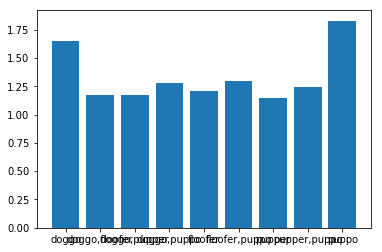

In [1035]:
# Bar Chart

bars = ['doggo', 'doggo,floofer', 'doggo,pupper','doggo,puppo', 'floofer', 'floofer,puppo', 'pupper', 'pupper,puppo','puppo']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, average_rating)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


For popular dog breeds (popular is considered to have more than 50 images), which breed is the goodest breed?

It turns out that the popular breeds were very close in ratings, but the Corgis took it out.

In [1036]:
breed_rating = twitter_clean[twitter_clean['dog_breed'] != '']
average_breed_rating = breed_rating.groupby(['dog_breed'])['overall_rating'].mean()
average_breed_rating[['corgi', 'retriever', 'poodle', 'chihuahua','pug', 'terrier']]

dog_breed
corgi        1.138710
retriever    1.136615
poodle       1.079688
chihuahua    1.052626
pug          1.027586
terrier      1.016038
Name: overall_rating, dtype: float64

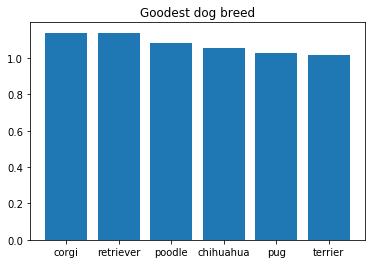

In [1037]:
#bar chart of goodest breed
bars = ['corgi', 'retriever', 'poodle', 'chihuahua','pug', 'terrier']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, average_breed_rating[['corgi', 'retriever', 'poodle', 'chihuahua','pug', 'terrier']])
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('Goodest dog breed') 
plt.savefig('Goodestdogbreed.png')
# Show graphic
plt.show()



While Corgis are rated the higest for goodest dog, on average retrievers receive the most favorites.

In [1038]:
breed_favorite = twitter_clean[twitter_clean['dog_breed'] != '']
average_breed_favorite = breed_favorite.groupby(['dog_breed'])['favorite_count'].mean()
average_breed_favorite[['corgi', 'retriever', 'poodle', 'chihuahua','pug', 'terrier']]

dog_breed
corgi        10899.086022
retriever    11934.742160
poodle        6904.140625
chihuahua     8513.777778
pug           6228.931034
terrier       7970.584906
Name: favorite_count, dtype: float64

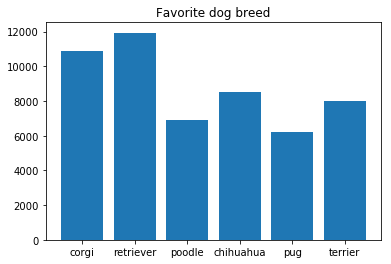

In [1039]:
#bar chart of goodest breed
bars = ['corgi', 'retriever', 'poodle', 'chihuahua','pug', 'terrier']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, average_breed_favorite[['corgi', 'retriever', 'poodle', 'chihuahua','pug', 'terrier']])
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('Favorite dog breed')
plt.savefig('FavoriteBreed')
# Show graphic
plt.show()

In [1040]:
twitter_clean[twitter_clean['dog_breed'] == 'accordion'].tweet_id

2357    670842764863651840
Name: tweet_id, dtype: int64

## Information for act_report

### The first post

In [1041]:
first_post = twitter_clean['timestamp'].min()
output_cols = ['tweet_id','favorite_count', 'retweet_count', 'timestamp', 'text', 'overall_rating']
twitter_clean[output_cols][twitter_clean['timestamp']==first_post]

,tweet_id,favorite_count,retweet_count,timestamp,text,overall_rating
2636,666020888022790149,2527,527,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,0.8


### The goodest doggo

Which dog has the highest rating?

In [1042]:
goodest_doggo = twitter_clean['overall_rating'].max()
twitter_clean[output_cols][twitter_clean['overall_rating']==goodest_doggo]

,tweet_id,favorite_count,retweet_count,timestamp,text,overall_rating
1266,749981277374128128,5586,2761,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,177.6


In [1043]:
twitter_clean[twitter_clean['tweet_id'] == 749981277374128128].jpg_url

1266    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [1044]:
twitter_clean[twitter_clean['tweet_id'] == 670842764863651840].jpg_url

2357    https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg
Name: jpg_url, dtype: object

In [1045]:
twitter_clean[twitter_clean['tweet_id'] == 670842764863651840].favorite_count

2357    25831
Name: favorite_count, dtype: int64

## Source:
https://gist.github.com/freimanas/39f3ad9a5f0249c0dc64
